In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("Mall_Customers.csv")

In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
x=dataset.iloc[ :, [3,4]].values

In [7]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distance')

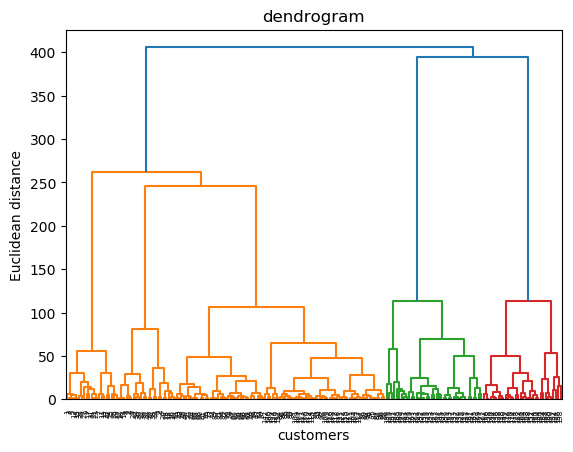

In [8]:
dendrogram=sch.dendrogram(sch.linkage(x,method="ward"))
                          
plt.title("dendrogram")                       
plt.xlabel("customers")
plt.ylabel("Euclidean distance")                          

In [11]:
!pip install sklearn.cluster

ERROR: Could not find a version that satisfies the requirement sklearn.cluster (from versions: none)
ERROR: No matching distribution found for sklearn.cluster


In [12]:
from sklearn.cluster import AgglomerativeClustering


In [14]:
clusmodel=AgglomerativeClustering(n_clusters=5)
label=clusmodel.fit_predict(x)

E:\anacoda3\envs\hopeai\lib\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [15]:
supervised=pd.DataFrame(dataset)
supervised['cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [16]:
import seaborn as sns

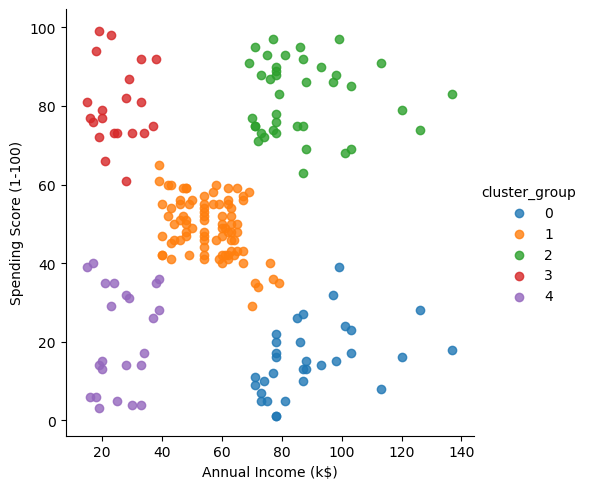

In [17]:
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False)